In [7]:
from collections import OrderedDict, Counter
import numpy as np
import pandas as pd

from pprint import pprint


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_matrix(matrix, title="some matrix", figsize: tuple=(10,4)):
    cmap = mcolors.LinearSegmentedColormap.from_list(
        "red_white_blue", ["red", "white", "blue"]
    )
    cmap_norm = mcolors.TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)
    
    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(
        matrix,
        aspect="auto",
        cmap=cmap,
        norm=cmap_norm
    )
    fig.suptitle(title),
    plt.show()
    plt.close()


# Studying and block encoding F matrices

$F_1$ matrix should be of size $Q \times Q$ where Q=27 for a block at some position on the grid.

$F_2$ encodes the second order terms in the non-linear ODE and block with the non-zero elements should be of size $Q \times Q^2$.

$F_3$ encodes the third order terms in the non-linear ODE and block with the non-zero elements should be of size $Q \times Q^3$

All these matrices have matrix elements that calculated by calculating dot products between velocity directions and multiplying by some weights that are pre-determined

## Preliminaries ##

[Lattice Constants table](lattice_constants.png)

**velocity vectors and weights:** The number should be 27 for each

In [8]:
velocity_directions = [
    (0, 0, 0),      # 0
    (1, 0, 0),      # 1 -  
    (-1, 0, 0),     # 2
    (0, 1, 0),      # 3
    (0, -1, 0),     # 4
    (0, 0, 1),      # 5
    (0, 0, -1),     # 6
    (1, 1, 0),      # 7 --
    (-1, -1, 0),    # 8
    (1, 0, 1),      # 9
    (-1, 0, -1),    # 10
    (0, 1, 1),      # 11
    (0, -1, -1),    # 12
    (1, -1, 0),     # 13
    (-1, 1, 0),     # 14
    (1, 0, -1),     # 15
    (-1, 0, 1),     # 16
    (0, 1, -1),     # 17 
    (0, -1, 1),     # 18
    (1, 1, 1),      # 19 ---
    (-1, -1, -1),   # 20
    (1, 1, -1),     # 21
    (-1, -1, 1),    # 22
    (1, -1, 1),     # 23
    (-1, 1, -1),    # 24
    (-1, 1, 1),     # 25
    (1, -1, -1)     # 26
]
print("The number of directions: ", len(velocity_directions))

weights = [
    8/27,   #0
    2/27,   #1-
    2/27,   #2
    2/27,   #3
    2/27,   #4
    2/27,   #5
    2/27,   #6
    1/54,   #7--
    1/54,   #8
    1/54,   #9
    1/54,   #10
    1/54,   #11
    1/54,   #12
    1/54,   #13
    1/54,   #14
    1/54,   #15
    1/54,   #16
    1/54,   #17
    1/54,   #18
    1/216,  #19---
    1/216,  #20
    1/216,  #21
    1/216,  #22
    1/216,  #23
    1/216,  #24
    1/216,  #25
    1/216   #26
]

print("The number of weights: ", len(weights))

#pprint(weights)

The number of directions:  27
The number of weights:  27


We need to count the number of multiplicities for a matrix

In [9]:
def count_multiplicities(matrix):

    # Step 2: Flatten the matrix
    flattened_matrix = matrix.flatten()

    # Step 3: Filter out zero elements
    non_zero_elements = flattened_matrix[flattened_matrix != 0]

    # Step 4: Count multiplicities
    multiplicities = Counter(non_zero_elements)
    return multiplicities

Next we need code to return a matrix element and list of tuples [(row, column)... (row, column)] where it appears.

In [10]:
def find_element_positions(matrix):
    # Dictionary to hold the positions of each element
    positions = {}
    
    # Iterate through the matrix to fill the positions dictionary
    for i, row in enumerate(matrix):
        for j, element in enumerate(row):
            if element == 0:
                    continue
            if element not in positions:
                positions[element] = [(i, j)]
            else:
                positions[element].append((i, j))
    
    return positions

### $F_1$ matrix ###

$$ F_{ii} = (−1 + w_i + 3w_i(c_i \cdot c_i)) \frac{1}{\tau} $$
$$ F_{ij} = (1 + (c_i \cdot c_j )) \frac{w_i}{\tau} $$
$$ F_{ji} = (1 + (c_i \cdot c_j )) \frac{w_j}{\tau} $$

JOHN P COMMENT:  MISSING coefficient of 3 before dot product in second formula.  JOHNP fixed it in the code below.

Creating and studying the $F_1$ matrix. Note that this creates just an upper triangular matrix is $F_1$ is a symmetric matrix. Note that  $\frac{1}{\tau} =0.6$ 

JOHNP COMMENT:  because of the weights $w_i$, $F_1$ is not symmetric.

The unique elements found : [-1.58950617 -1.45061728 -1.17283951 -0.24691358 -0.15432099 -0.0617284
 -0.03858025 -0.0154321   0.00771605  0.0308642   0.05401235  0.12345679
  0.21604938  0.49382716]
The number of unique elements is :  14
The number of non zero elements:  729
rank F_1 matrix: 23
F_1 matrix inf-norm: 14.012345679012347
F_1 matrix 1-norm: 5.802469135802469
F_1 matrix spectral norm: 3.061862178478972


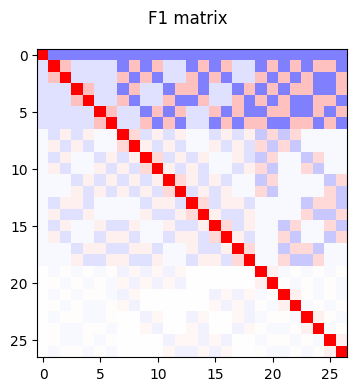

In [ ]:
def create_f1_matrix(vectors, weights, tau):
    f_1_matrix = np.zeros((len(vectors), len(vectors)))
    for i in range(0, len(vectors)):
        for j in range(0, len(vectors)): 
            if i==j:
                f_1_matrix[i][j] = (weights[i] + 3*weights[i]*np.dot(vectors[i], vectors[j]) -1)/tau
            else:
                f_1_matrix[i][j] = weights[i]*(3*np.dot(vectors[i],vectors[j]) + 1)/tau
                
    return f_1_matrix

f1_matrix = create_f1_matrix(velocity_directions,weights,tau=0.6)

unique_elements = np.unique(f1_matrix)
number_of_non_zero_elemnts = np.count_nonzero(f1_matrix)
print("The unique elements found :", unique_elements)
multiplicities = count_multiplicities(f1_matrix)
print("The number of unique elements is : ", len(unique_elements))
print("The number of non zero elements: ", number_of_non_zero_elemnts)



print(f"rank F_1 matrix: {np.linalg.matrix_rank(f1_matrix)}")
print(f"F_1 matrix inf-norm: {np.linalg.norm(f1_matrix, ord=np.inf)}")
print(f"F_1 matrix 1-norm: {np.linalg.norm(f1_matrix, ord=1)}")
print(f"F_1 matrix spectral norm: {np.linalg.norm(f1_matrix, ord=2)}")
plot_matrix(f1_matrix, title="F1 matrix", figsize=(4,4))

### Infinity norm of $F_1$ ###

In [ ]:
f1_norm=np.linalg.norm(f1_matrix, ord=np.inf)

print(f"F1_inf_norm: {f1_norm}")


F1_inf_norm: 14.012345679012347
JOHNP agrees with this value.


The mismatch between number of unique elements and length of multiplicities dictionary is that the former includes the matrix element 0 while in the second we are only considering the non-zero elements

### $F_2$ matrix ### 

$$F_{a=i,b=(j,k)} = \frac{w_i}{\tau} [9(c_i \cdot c_j )(c_i \cdot c_k) - 3(c_j \cdot c_k)]$$




size of F_2 matrix: (27, 729)
rank F_2 matrix: 6
F_2 matrix inf-norm: 942.2222222222222
F_2 matrix 1-norm: 12.222222222222227
The unique elements found : [-4.44444444 -2.96296296 -1.48148148 -1.11111111 -1.01851852 -0.92592593
 -0.83333333 -0.74074074 -0.55555556 -0.46296296 -0.37037037 -0.27777778
 -0.25462963 -0.23148148 -0.18518519 -0.13888889 -0.11574074 -0.09259259
 -0.06944444 -0.0462963  -0.02314815  0.          0.02314815  0.0462963
  0.06944444  0.09259259  0.11574074  0.13888889  0.18518519  0.23148148
  0.25462963  0.27777778  0.37037037  0.46296296  0.55555556  0.74074074
  0.83333333  0.92592593  1.01851852  1.11111111  1.48148148  2.96296296
  4.44444444]
The number of non zero elements:  15180
The number of unique elements is :  43
rank F_2 matrix: 6
F_2 matrix inf-norm: 942.2222222222222
F_2 matrix 1-norm: 12.222222222222227
F_2 matrix spectral norm: 47.434164902525694


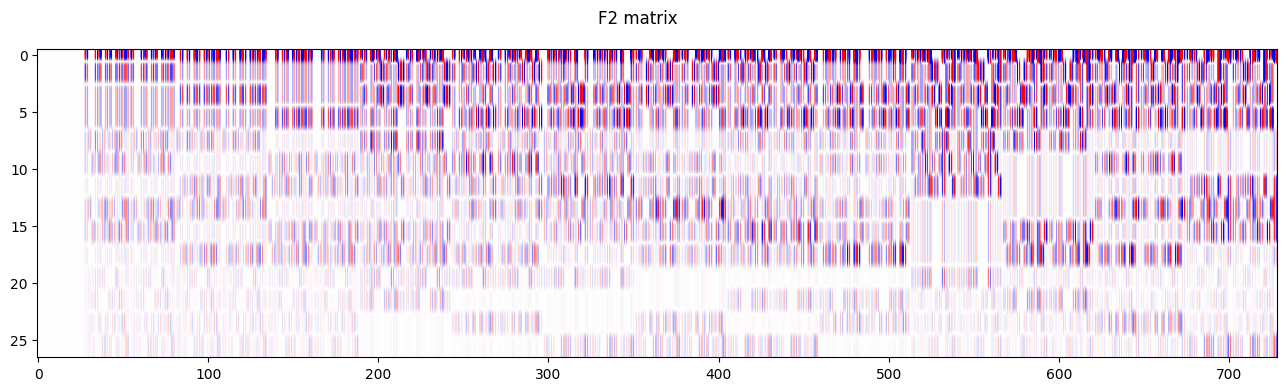

In [13]:
def create_f2_matrix(v, w, tau):
    Q = len(v)
    f_2_matrix = np.zeros((len(v), len(v)*len(v)))
    for i in range(Q):
        for j in range(Q):
            for k in range(Q):
                c_ij = np.dot(v[i], v[j])
                c_ik = np.dot(v[i], v[k])
                c_jk = np.dot(v[j], v[k])

                # col_idx = j*k-1 # original
                col_idx = Q*j + k # JohnP fixed ....
                f_2_matrix[i][col_idx] = w[i]*(9*c_ij*c_ik - 3*c_jk)/tau #JOhnP: looks ok.
    return f_2_matrix

f2_matrix = create_f2_matrix(velocity_directions, weights, tau=0.6)
print("size of F_2 matrix: {}".format(np.shape(f2_matrix)))
print(f"rank F_2 matrix: {np.linalg.matrix_rank(f2_matrix)}")
print(f"F_2 matrix inf-norm: {np.linalg.norm(f2_matrix, ord=np.inf)}")
print(f"F_2 matrix 1-norm: {np.linalg.norm(f2_matrix, ord=1)}")


number_of_non_zero_elemnts = np.count_nonzero(f2_matrix)
unique_elements = np.unique(f2_matrix)
print("The unique elements found :", unique_elements)
multiplicities = count_multiplicities(f2_matrix)
print("The number of non zero elements: ", number_of_non_zero_elemnts)
print("The number of unique elements is : ", len(unique_elements))
# print(" The multiplicities of the unique elements: {} and the length of the dict is {}".format(multiplicities, len(multiplicities)))
# print("list of row and column indices for the elements: ", find_element_positions(f2_matrix))

print(f"rank F_2 matrix: {np.linalg.matrix_rank(f2_matrix)}")
print(f"F_2 matrix inf-norm: {np.linalg.norm(f2_matrix, ord=np.inf)}")
print(f"F_2 matrix 1-norm: {np.linalg.norm(f2_matrix, ord=1)}")
print(f"F_2 matrix spectral norm: {np.linalg.norm(f2_matrix, ord=2)}")
plot_matrix(f2_matrix, title="F2 matrix", figsize=(16,4))



$$ F_{a=i, b=(k,l)} =  \left(3(c_i \cdot c_k)(c_i \cdot c_l) - (c_k \cdot c_l)\right) \left(\frac{3w_i}{2\tau} \right)$$



In [14]:
f2_norm= np.linalg.norm(f2_matrix, ord=np.inf)

print(f"F2_inf_norm: {f2_norm}")

F2_inf_norm: 942.2222222222222


size of F_3 matrix: (27, 19683)
The number of unique elements is :  43
unique elements:  [-2.22222222 -1.48148148 -0.74074074 -0.55555556 -0.50925926 -0.46296296
 -0.41666667 -0.37037037 -0.27777778 -0.23148148 -0.18518519 -0.13888889
 -0.12731481 -0.11574074 -0.09259259 -0.06944444 -0.05787037 -0.0462963
 -0.03472222 -0.02314815 -0.01157407 -0.          0.01157407  0.02314815
  0.03472222  0.0462963   0.05787037  0.06944444  0.09259259  0.11574074
  0.12731481  0.13888889  0.18518519  0.23148148  0.27777778  0.37037037
  0.41666667  0.46296296  0.50925926  0.55555556  0.74074074  1.48148148
  2.22222222]
The number of non zero elements:  409860
F3_inf_norm: 12719.999999999996
max element:  2.2222222222222223
rank F_3 matrix: 6
F_3 matrix inf-norm: 12719.999999999996
F_3 matrix 1-norm: 6.111111111111113
F_3 matrix spectral norm: 123.2375754386643


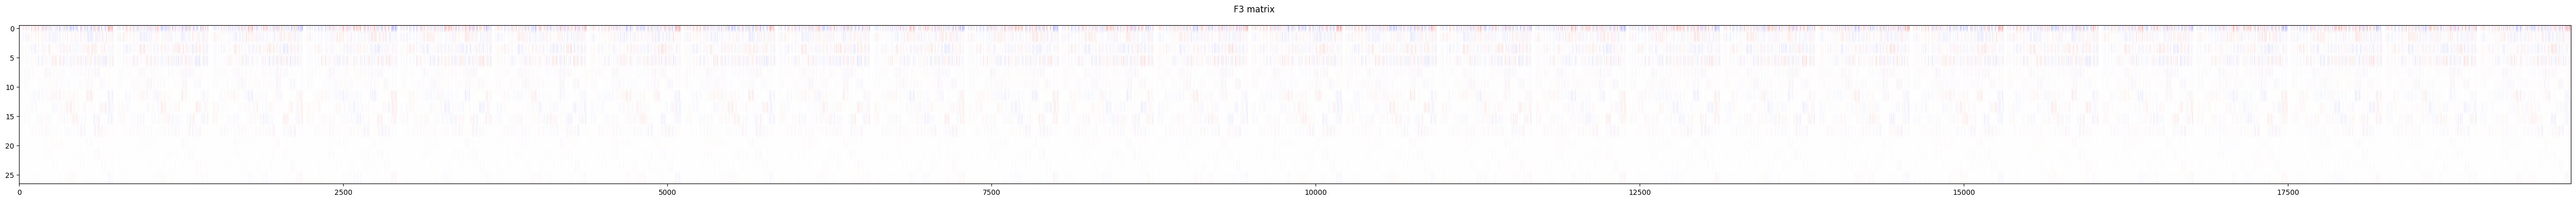

In [ ]:
Q = len(velocity_directions)
f2_sub_block = np.zeros((Q, Q, Q))
def create_f3_matrix(v, w, tau):
    Q = len(v)
    for i in range(Q):
        for k in range(Q): # JOHN P changed this from j to k for sanity.
            for ell in range(Q): # JOHNP changed this from k to ell for sanity.
                c_ik = np.dot(v[i], v[k])
                c_iell = np.dot(v[i], v[ell])
                c_kell = np.dot(v[k], v[ell])

                # JOHNP NOTE: we are using the formula for F_2 matrix.  it's correct here.
                f2_sub_block[i][k][ell] = (3*w[i]/tau)*(3*c_ik*c_iell - c_kell)

    # JOHNP NOTE: for the whole "subblock/tiling" thing to work, then we need
    # to translate the F_2 block with (i,j,k) indexing into F_3 indexing (i,j,k,ell)
    # taken exactly from equations 131, 132 ... F_2 and F_3 look very similiar...
    # to translate we need to take [F_2]_(i,j,k) and set it to [F_2]subblock_(i,xxx,k,ell)
    # Then fill in F_3 with repeated F_2_sublocks along index 1 (as the "j" index.)
    
    # NOTE: we are inserting a new axis in axis 1.
    f3_matrix = np.repeat(f2_sub_block[:,np.newaxis,:,:], len(weights), axis=1)
    f3_matrix *= -0.5 # vestigial -0.5 from the formula.
    f3_matrix = f3_matrix.reshape(Q, Q**3)
    return f3_matrix

f3_matrix = create_f3_matrix(velocity_directions, weights, tau=0.6)
print("size of F_3 matrix: {}".format(np.shape(f3_matrix)))

unique_elements = np.unique(f3_matrix)
number_of_non_zero_elemnts = np.count_nonzero(f3_matrix)
# print("The unique elements found :", unique_elements)
multiplicities = count_multiplicities(f3_matrix)
f3_norm = np.linalg.norm(f3_matrix, ord=np.inf)
print("The number of unique elements is : ", len(unique_elements))
print("unique elements: ", unique_elements)
print("The number of non zero elements: ", number_of_non_zero_elemnts)
print(f"F3_inf_norm: {f3_norm}")
print("max element: ", np.max(f3_matrix))


print(f"rank F_3 matrix: {np.linalg.matrix_rank(f3_matrix)}")
print(f"F_3 matrix inf-norm: {np.linalg.norm(f3_matrix, ord=np.inf)}")
print(f"F_3 matrix 1-norm: {np.linalg.norm(f3_matrix, ord=1)}")
print(f"F_3 matrix spectral norm: {np.linalg.norm(f3_matrix, ord=2)}")
plot_matrix(f3_matrix, title="F3 matrix", figsize=(64,4))

Bounding the max convergence time for Carleman Linearization $$ \frac{1}{2\|x_0\| \left( \| F_2\| + \|F_3\|\right) + \|S\| + \|F_1\| + \|F_2 \| } \leq T^* \le \frac{1}{2\|x_0\| \left( \|F_2\| + \|F_3\| \right)} $$

In [16]:
x_0 = 0.29575
lowerbound = 1/(2*x_0*(f2_norm+f3_norm)+ 2 + f1_norm + f2_norm)
upperbound = 1/(2*x_0*(f2_norm+f3_norm))
print("lower bound in lattice units: ", lowerbound)
print("upper bound in lattice units: ", upperbound)

lower bound in lattice units:  0.00011062633407164348
upper bound in lattice units:  0.00012374393036021587


$T_{physical} = \Delta t (T_{lattice units})$. $Re=1, Re=10, Re=10^2, Re=10^3, Re=10^4, Re=10^5, Re=10^6, Re=10^7, Re=10^8$

In [19]:
df = pd.read_csv("problem_instance_parameters_and_results_20241203_newsphere.xlsx - one-sheet.csv")
df.set_index("Parameter", inplace=True)
delta_t = df.loc["delta_t"]
utility_time_discretizations = list(map(float, delta_t.loc["Sphere Re=10^1":].values.tolist()))
print(utility_time_discretizations)

lower_bound_physical_times= list(map(lambda x: lowerbound* x ,utility_time_discretizations))
upper_bound_physical_times= list(map(lambda x: upperbound* x ,utility_time_discretizations))

print(f"lower bound physical times:{lower_bound_physical_times}")
print(f"upper bound phyical times: {upper_bound_physical_times}")

upper_and_lower_bounds = [x for pair in zip(upper_bound_physical_times, lower_bound_physical_times) for x in pair]

print(f"upper and lower bounds: {upper_and_lower_bounds}")

[332.336324360253, 3.32336324360253, 0.0332336324360253, 0.00033233632436025, 3.32336324360253e-06, 3.323363243603e-08, 3.3233632436025e-10, 3.32336324360253e-12]
lower bound physical times:[np.float64(0.036765149242819414), np.float64(0.0003676514924281942), np.float64(3.6765149242819415e-06), np.float64(3.6765149242819084e-08), np.float64(3.676514924281942e-10), np.float64(3.676514924282462e-12), np.float64(3.6765149242819086e-14), np.float64(3.676514924281942e-16)]
upper bound phyical times: [np.float64(0.04112460297780526), np.float64(0.0004112460297780526), np.float64(4.112460297780526e-06), np.float64(4.1124602977804886e-08), np.float64(4.112460297780526e-10), np.float64(4.1124602977811076e-12), np.float64(4.112460297780489e-14), np.float64(4.112460297780526e-16)]
upper and lower bounds: [np.float64(0.04112460297780526), np.float64(0.036765149242819414), np.float64(0.0004112460297780526), np.float64(0.0003676514924281942), np.float64(4.112460297780526e-06), np.float64(3.676514924

### Creating data structures for pandas data frame

In [24]:
reynold_numbers = [10, 1e2,  1e3,  1e4,  1e5, 1e6,  1e7, 1e8]
duplicated_reynold_numbers = [x for x in reynold_numbers for _ in (0, 1)]
duplicated_utility_time_discretizations = [x for x in utility_time_discretizations for _ in (0, 1)]

data_table = {
    "Re": duplicated_reynold_numbers,
    "$\Delta t$": duplicated_utility_time_discretizations,
    "Bound": ["upper bound", "lower bound"]*8,
    "$T_{phys}$":upper_and_lower_bounds

}

# Create DataFrame
df = pd.DataFrame(data_table)

# Display DataFrame
display(df)

,Re,$\Delta t$,Bound,$T_{phys}$
0,10.0,3.323363e+02,upper bound,4.112460e-02
1,10.0,3.323363e+02,lower bound,3.676515e-02
2,100.0,3.323363e+00,upper bound,4.112460e-04
3,100.0,3.323363e+00,lower bound,3.676515e-04
4,1000.0,3.323363e-02,upper bound,4.112460e-06
5,1000.0,3.323363e-02,lower bound,3.676515e-06
6,10000.0,3.323363e-04,upper bound,4.112460e-08
7,10000.0,3.323363e-04,lower bound,3.676515e-08
8,100000.0,3.323363e-06,upper bound,4.112460e-10
9,100000.0,3.323363e-06,lower bound,3.676515e-10
